# Imports

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.patches as patches
import cv2
from google.colab.patches import cv2_imshow
import random

from PIL import Image, ImageOps

In [ ]:
!git clone https://github.com/therealarman/Gold-Particle-Segmentation

Cloning into 'Gold-Particle-Segmentation'...
remote: Enumerating objects: 444, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 444 (delta 35), reused 105 (delta 33), pack-reused 329
Receiving objects: 100% (444/444), 402.26 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (151/151), done.
Checking out files: 100% (235/235), done.


In [ ]:
# Function to scale up coordinate data to match the actual images
def coordinateMultiply(data, x = 'X', y = 'Y', xn = 1789, yn = 1789):
  X = data[x]
  Y = data[y]

  xConv = X.multiply(xn)
  yConv = Y.multiply(yn)

  return(xConv, yConv)

In [ ]:
# Function to convert Tiff files to Numpy Arrays
def imToArray(url):
  im = Image.open(url)
  imarray = np.array(im, dtype=np.uint8)
  return(imarray)

# Function to convert Numpy Arrays (from first function) to Images
def imToImage(url):
  imarray = imToArray(url)
  img = Image.fromarray(imarray)
  return(img)

# Image Augmentation w Rotate, Flip (Not Used)

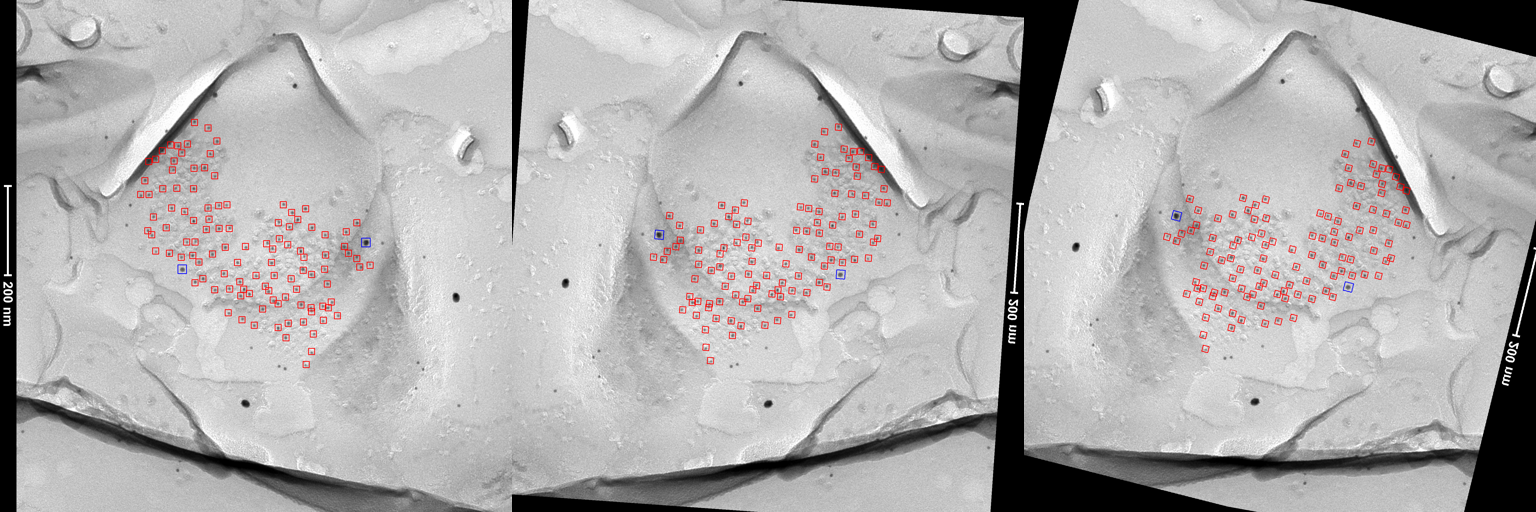

In [ ]:
#ids = ['S1', 'S4', 'S7', 'S8', 'S13', 'S15', 'S25', 'S27', 'S29']
ids = ['S4']

for id in ids:
    #Get data & Images
    df6nm = pd.read_csv('/content/Gold-Particle-Segmentation/Synapses/2022 Analyzed Synapses/'+id+'/Results/Results 6nm XY in microns.csv')
    df6nm = pd.DataFrame(df6nm)
    x, y = coordinateMultiply(df6nm)

    df12nm = pd.read_csv('/content/Gold-Particle-Segmentation/Synapses/2022 Analyzed Synapses/'+id+'/Results/Results 12nm XY in microns.csv')
    df12nm = pd.DataFrame(df12nm)
    _x, _y = coordinateMultiply(df12nm)

    imarray = imToArray('/content/Gold-Particle-Segmentation/Synapses/2022 Analyzed Synapses/'+id+'/'+id+' MBTt FFRIL01 R1Bg1d Wt 8wk AMPA6nm_NR1_12nm_vGlut2_18nm '+id+'.tif')
    h, w = imarray.shape[:2]

    if(len(imarray.shape) < 3):
      imarray = cv2.cvtColor(imarray,cv2.COLOR_GRAY2RGB)

    #Draw Bounding Boxes
    s = 25
    _s = 35

    for i in range(len(x)):
        tx = int(y[i] - (s/2))
        ly = int(x[i] - (s/2))
        bx = int(y[i] + (s/2))
        ry = int(x[i] + (s/2))

        imarray = cv2.rectangle(imarray, (ly,tx), (ry,bx), (0,0,255), 2)

    for i in range(len(_x)):
        tx = int(_y[i] - (_s/2))
        ly = int(_x[i] - (_s/2))
        bx = int(_y[i] + (_s/2))
        ry = int(_x[i] + (_s/2))

        imarray = cv2.rectangle(imarray, (ly,tx), (ry,bx), (255,0,0), 2)

    #Crop
    left = (w - 2048)/2
    top = (h - 2048)/2
    right = (w + 2048)/2
    bottom = (h + 2048)/2

    img = Image.fromarray(imarray).crop((0, top, right, bottom))
    
    a = []

    for i in range(0, 3):
      #Flip
      flip = random.randrange(2)
      if(flip == 0):
          auImg = img.rotate(0)
      elif(flip == 1):
          auImg = img.transpose(Image.FLIP_LEFT_RIGHT)
      elif(flip == 2):
          auImg = img.transpose(Image.FLIP_TOP_BOTTOM)
    
      #Rotate
      rot = random.randrange(-15,15)
      #print("Rot: " + str(rot))
      #print("Flip: " + str(flip))
      img = auImg.rotate(rot)

      #Resize
      auImg = auImg.resize((512, 512))

      a.append(np.array(auImg))

      #filename = str(id) + "_" + str(i) + ".jpg"
      #print(filename)
      #cv2.imwrite(filename, auImg)
      #files.download(filename)

    imgPrev = cv2.hconcat(a)
    cv2_imshow(imgPrev)

#Image Downsizing (This was used for training)

In [ ]:
def makeData(x, y, _x, _y, b, _b, size):

  df6 = pd.DataFrame(columns = ["id", "x", "y", "w", "h"])
  df6['x'] = x/size
  df6['y'] = y/size
  df6['w'] = b/size
  df6['h'] = b/size
  df6['id'] = 0

  df12 = pd.DataFrame(columns = ["id", "x", "y", "w", "h"])
  df12['x'] = _x/size
  df12['y'] = _y/size
  df12['w'] = _b/size
  df12['h'] = _b/size
  df12['id'] = 1

  labels = pd.concat([df6, df12])

  filename = id+".txt"
  labels.to_csv(filename, sep='\t', header = False, index = False)
  files.download(filename)
  
  return(labels)

In [ ]:
ids = ['S1', 'S4', 'S7', 'S8', 'S13', 'S15', 'S25', 'S27', 'S29']
#ids = ['S1']

for id in ids:
    #Get data & Images
    df6nm = pd.read_csv('/content/Gold-Particle-Segmentation/Synapses/2022 Analyzed Synapses/'+id+'/Results/Results 6nm XY in microns.csv')
    df6nm = pd.DataFrame(df6nm)
    x, y = coordinateMultiply(df6nm)

    df12nm = pd.read_csv('/content/Gold-Particle-Segmentation/Synapses/2022 Analyzed Synapses/'+id+'/Results/Results 12nm XY in microns.csv')
    df12nm = pd.DataFrame(df12nm)
    _x, _y = coordinateMultiply(df12nm)

    imarray = imToArray('/content/Gold-Particle-Segmentation/Synapses/2022 Analyzed Synapses/'+id+'/'+id+' MBTt FFRIL01 R1Bg1d Wt 8wk AMPA6nm_NR1_12nm_vGlut2_18nm '+id+'.tif')
    h, w = imarray.shape[:2]

    if(len(imarray.shape) < 3):
      imarray = cv2.cvtColor(imarray,cv2.COLOR_GRAY2RGB)

    #Crop
    left = (w - 2048)/2
    top = (h - 2048)/2
    right = (w + 2048)/2
    bottom = (h + 2048)/2

    img = Image.fromarray(imarray).crop((left, top, right, bottom))

    #Check which side has been changed
    if(img.size[0] < h):
      sideToChange = 'h'
    elif(img.size[1] < w):
      sideToChange = 'w'
    
    #Resize Image
    img = img.resize((512, 512))

    #Multiply data values
    x = x.multiply(0.25)
    y = y.multiply(0.25)
    _x = _x.multiply(0.25)
    _y = _y.multiply(0.25)

    #Adjust data based on crop
    if(sideToChange == 'h'):
      y = y.subtract(8.375)
      _y = _y.subtract(8.375)
    elif(sideToChange == 'w'):
      x = x.subtract(8.375)
      _x = _x.subtract(8.375)

    bbImg = np.array(img)

    #Draw Bounding Boxes
    s = 6
    _s = 8

    for i in range(len(x)):
        tx = int(y[i] - (s/2))
        ly = int(x[i] - (s/2))
        bx = int(y[i] + (s/2))
        ry = int(x[i] + (s/2))

        bbImg = cv2.rectangle(bbImg, (ly,tx), (ry,bx), (0,0,255), 1)

    for i in range(len(_x)):
        tx = int(_y[i] - (_s/2))
        ly = int(_x[i] - (_s/2))
        bx = int(_y[i] + (_s/2))
        ry = int(_x[i] + (_s/2))

        bbImg = cv2.rectangle(bbImg, (ly,tx), (ry,bx), (255,0,0), 1)

    labels = makeData(x, y, _x, _y, 6, 8, 512)

    filename = str(id)+".jpg"
    img.save(filename)
    files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>